In [45]:
!apt install libspatialindex-dev
!pip install geopandas
!pip install folium mapclassify ##potrzebne do mapy interaktywnej

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-dev is already the newest version (1.8.5-5).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [46]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import mapclassify
import folium
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,10] ##wielkość wykresów

https://geopandas.org/en/stable/getting_started/introduction.html

In [47]:
pow_df = gpd.read_file(filename = "powiaty.shp", encoding = "utf-8")
pow_df = pow_df[["SP_ID", "jpt_kod_je", "jpt_nazwa_", "geometry"]]
pow_df.head(n = 2)

,SP_ID,jpt_kod_je,jpt_nazwa_,geometry
0,0,0226,powiat złotoryjski,"POLYGON ((269083.616 370884.075, 269164.192 37..."
1,1,0262,powiat Legnica,"POLYGON ((296226.609 372333.783, 296689.158 37..."


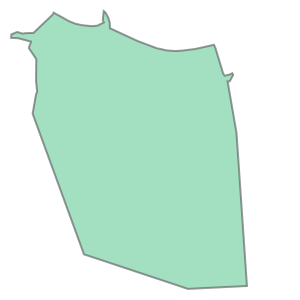

In [48]:
pow_df.geometry[366]

In [49]:
pow_df.jpt_nazwa_[366]

'powiat Świnoujście'

In [50]:
pow_df.query("jpt_nazwa_ == 'powiat Poznań'").SP_ID ##346 element to Poznań

346    346
Name: SP_ID, dtype: object

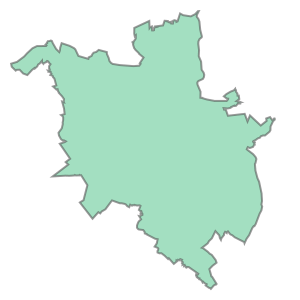

In [51]:
pow_df.geometry[346]

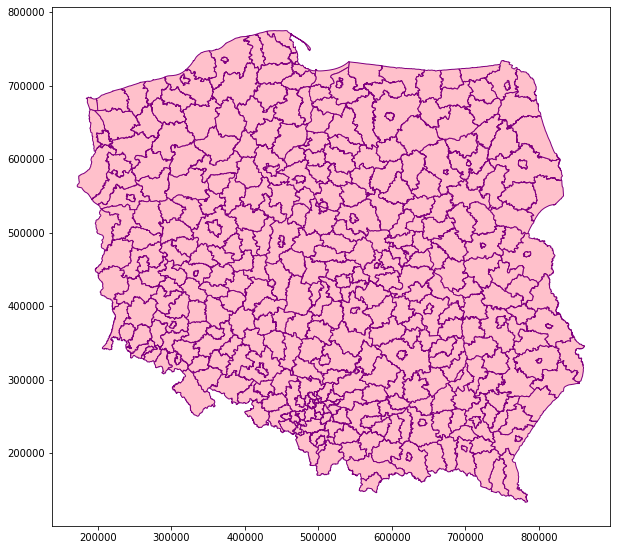

In [52]:
pow_df.plot(color="pink", edgecolor="purple")

Dodaję informacje o przynależności danego powiatu województwa a następnie rysuję  mapę województwa wielkopolskiego (30)

In [53]:
pow_df['kod_woj']=pow_df.jpt_kod_je.str.slice(0,2)
pow_df.head()

,SP_ID,jpt_kod_je,jpt_nazwa_,geometry,kod_woj
0,0,0226,powiat złotoryjski,"POLYGON ((269083.616 370884.075, 269164.192 37...",02
1,1,0262,powiat Legnica,"POLYGON ((296226.609 372333.783, 296689.158 37...",02
2,2,0206,powiat jeleniogórski,"POLYGON ((244044.051 332419.671, 244238.860 33...",02
3,3,0204,powiat górowski,"POLYGON ((311163.070 427025.480, 311278.286 42...",02
4,4,0214,powiat oleśnicki,"POLYGON ((377122.144 378970.426, 377400.754 37...",02


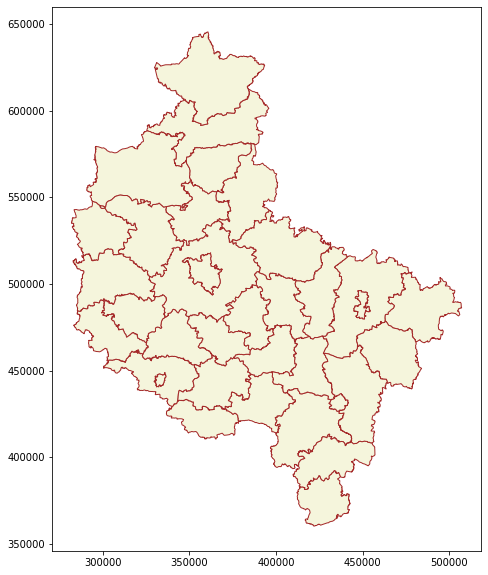

In [54]:
pow_df.query("kod_woj=='30'").plot(color="beige", edgecolor = "brown")

Mapa Poznania

In [55]:
pzn = gpd.read_file(filename='Poznan.shp', encoding='utf-8')
pzn.head(n=1)

,ID,dzielnica,latdeg,longdeg,geometry
0,1,DASZEWICE,52.313859,16.952755,"POLYGON ((16.953 52.314, 16.953 52.314, 16.953..."


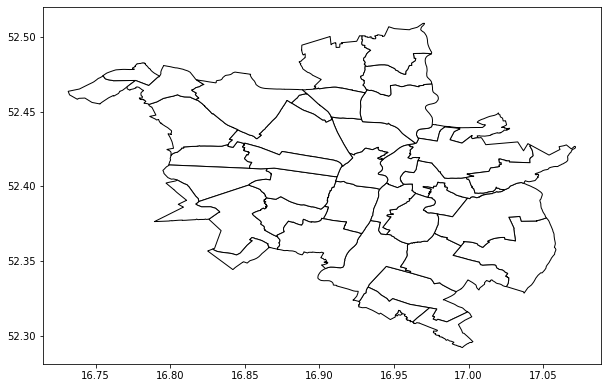

In [57]:
pzn.plot(color='white', edgecolor ="black")

czytujemy dane z Excela

In [63]:
wynag = pd.read_excel(io="powiaty_wynag.xlsx", sheet_name=1)
wynag=wynag[["Kod", "Wartosc"]]
wynag["kod"] = wynag.Kod.astype(str).str.zfill(7)
wynag["kod"] = wynag.kod.str.slice(start=0, stop=4)
wynag.head()

,Kod,Wartosc,kod
0,201000,4214.66,0201
1,202000,4024.94,0202
2,203000,4077.69,0203
3,204000,3815.89,0204
4,205000,4029.64,0205


In [64]:
pow_df_dane = pd.merge(left=pow_df,
                       right=wynag[["kod", "Wartosc"]],
                       how="left",
                       left_on = "jpt_kod_je",
                       right_on="kod")
pow_df_dane.head()

,SP_ID,jpt_kod_je,jpt_nazwa_,geometry,kod_woj,kod,Wartosc
0,0,0226,powiat złotoryjski,"POLYGON ((269083.616 370884.075, 269164.192 37...",02,0226,4362.98
1,1,0262,powiat Legnica,"POLYGON ((296226.609 372333.783, 296689.158 37...",02,0262,4259.37
2,2,0206,powiat jeleniogórski,"POLYGON ((244044.051 332419.671, 244238.860 33...",02,0206,4035.56
3,3,0204,powiat górowski,"POLYGON ((311163.070 427025.480, 311278.286 42...",02,0204,3815.89
4,4,0214,powiat oleśnicki,"POLYGON ((377122.144 378970.426, 377400.754 37...",02,0214,4128.29


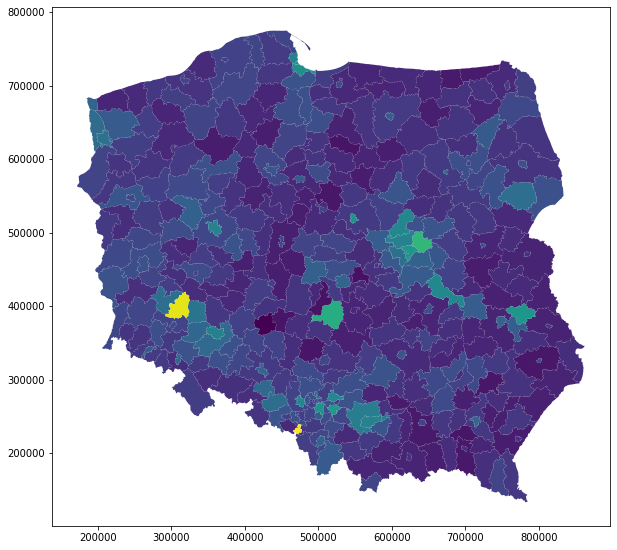

In [65]:
pow_df_dane.plot(column="Wartosc")

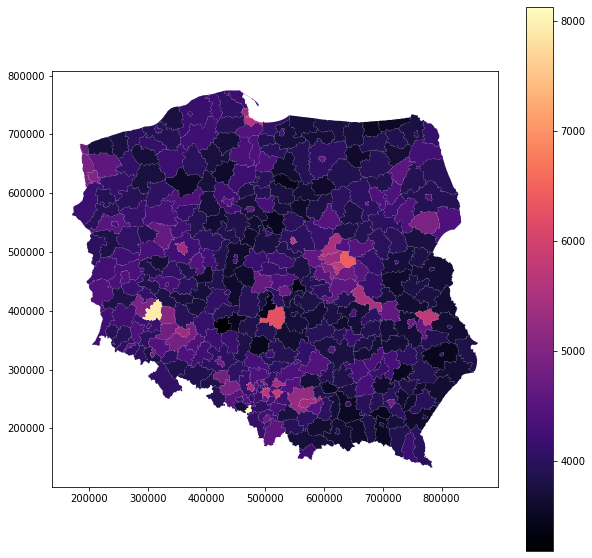

In [68]:
pow_df_dane.plot(column="Wartosc", 
                 cmap = "magma", 
                 legend = "true")

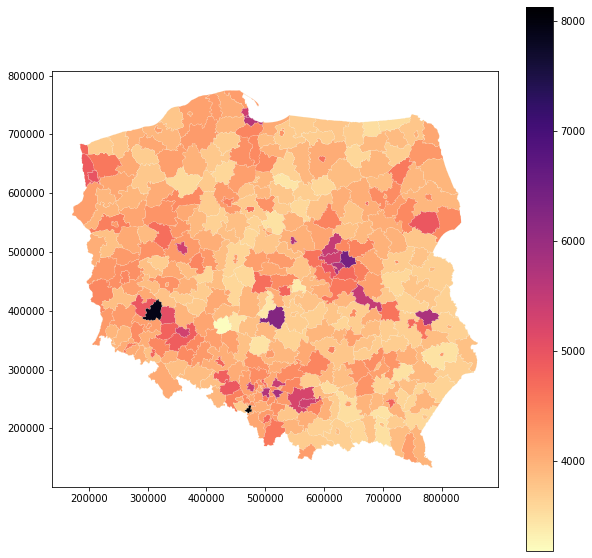

In [78]:
pow_df_dane.plot(column="Wartosc", 
                 cmap = "magma_r", 
                 legend = "true", 
                 edgecolor = "beige", 
                 linewidth=0.1)

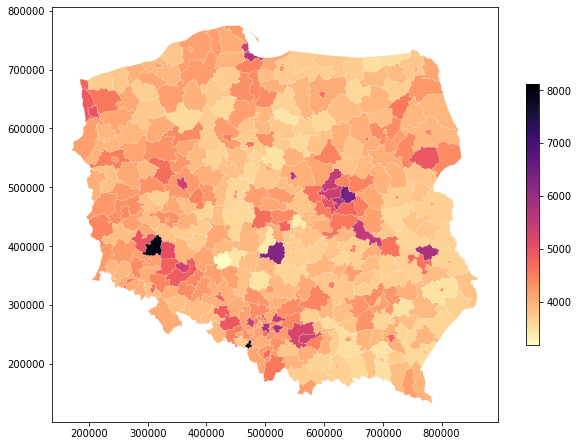

In [77]:
pow_df_dane.plot(column="Wartosc", 
                 cmap = "magma_r", 
                 legend = "true", 
                 edgecolor = "beige", 
                 linewidth=0.1, 
                 legend_kwds = {'shrink': 0.48})